In [1]:
import networkx as nx
import osmnx as ox
import matplotlib.pyplot as plt
import folium
from geopy.geocoders import Nominatim

# Criação do grafo

In [2]:
# Lista de cidades com campus da UTFPR e cidades grandes do Paraná
cidades = [
    "Curitiba, Paraná, Brazil",
    "Londrina, Paraná, Brazil",
    "Cornélio Procópio, Paraná, Brazil",
    "Apucarana, Paraná, Brazil",
    "Campo Mourão, Paraná, Brazil",
    "Ponta Grossa, Paraná, Brazil",
    "Pato Branco, Paraná, Brazil",
    "Dois Vizinhos, Paraná, Brazil",
    "Francisco Beltrão, Paraná, Brazil",
    "Medianeira, Paraná, Brazil",
    "Santa Helena, Paraná, Brazil",
    "Toledo, Paraná, Brazil",
    "Foz do Iguaçu, Paraná, Brazil",
    "Cascavel, Paraná, Brazil",
    "Guarapuava, Paraná, Brazil",
    "Maringá, Paraná, Brazil",
    "São José dos Pinhais, Paraná, Brazil",
    "Colombo, Paraná, Brazil",
    "Araucária, Paraná, Brazil",
    "Paranaguá, Paraná, Brazil",
    "Umuarama, Paraná, Brazil"
]

# Criar um grafo vazio
G = nx.Graph()

# Adicionar cada cidade ao grafo
for cidade in cidades:
    # Pegando a coordenada da cidade
    localizacao = ox.geocoder.geocode(cidade)
    G.add_node(cidade, pos=localizacao)

# Conectar todas as cidades (Completo)
for i, cidade1 in enumerate(cidades):
    for cidade2 in cidades[i+1:]:
        G.add_edge(cidade1, cidade2, weight=ox.distance.great_circle_vec(*G.nodes[cidade1]['pos'], *G.nodes[cidade2]['pos']))


C:\Users\jpedr\AppData\Local\Temp\ipykernel_13760\3048974354.py:38: FutureWarning: The `great_circle_vec` function has been renamed `great_circle`. Calling `great_circle_vec` will raise an error starting in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G.add_edge(cidade1, cidade2, weight=ox.distance.great_circle_vec(*G.nodes[cidade1]['pos'], *G.nodes[cidade2]['pos']))


# plotando o grafo

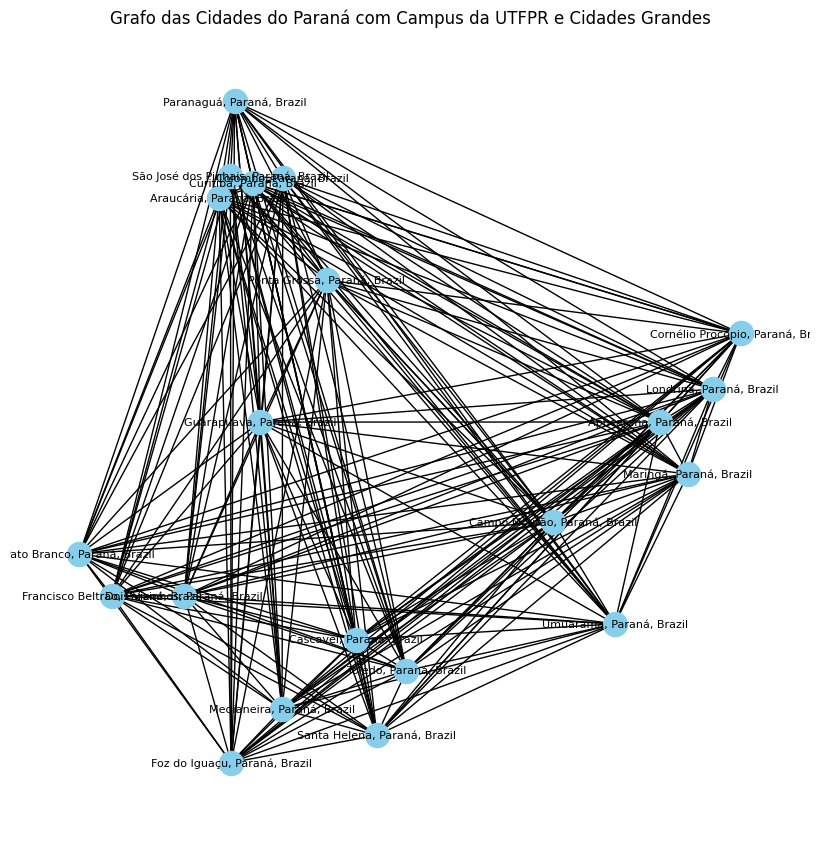

In [3]:
# Plotar o grafo
pos = nx.get_node_attributes(G, 'pos')
plt.figure(figsize=(8, 8))
nx.draw(G, pos, with_labels=True, node_size=300, font_size=8, node_color='skyblue')
plt.title("Grafo das Cidades do Paraná com Campus da UTFPR e Cidades Grandes")
plt.show()

# mapa desse grafo

In [4]:

# Inicializando o mapa centrado no Paraná
centro_mapa = [-24.7, -53.1]
mapa = folium.Map(location=centro_mapa, zoom_start=7)

# Geolocalizador para obter as coordenadas das cidades (caso precise de coordenadas adicionais)
geolocator = Nominatim(user_agent="mapa_interativo")

# Adicionando marcadores para cada cidade do grafo
for city, (lat, lon) in pos.items():
    folium.Marker(
        [lat, lon],
        popup=f"<b>{city}</b><br><a href='https://www.openstreetmap.org/?mlat={lat}&mlon={lon}' target='_blank'>Ver no Mapa</a>",
        tooltip=city
    ).add_to(mapa)

# Salvar o mapa interativo como um arquivo HTML
mapa.save("mapa_interativo.html")

# Problema do Caixeiro Viajante (TSP)

O Problema do Caixeiro Viajante (Traveling Salesman Problem - TSP) é um problema clássico de otimização em teoria dos grafos e ciência da computação. Ele pode ser descrito da seguinte forma:

## Descrição

Um caixeiro viajante deve visitar uma série de cidades e retornar à cidade inicial, de forma a minimizar o custo total da viagem. O custo pode ser a distância, tempo, ou qualquer outra métrica relevante entre as cidades.

### Problema Formal

- **Entrada**: Um conjunto de cidades e a matriz de custos ou distâncias entre todas as pares de cidades.
- **Saída**: A rota que passa por cada cidade exatamente uma vez e retorna à cidade inicial, com o custo total mínimo.

### Objetivo

Encontrar a rota mais curta (ou de menor custo) que permite ao caixeiro viajante visitar cada cidade exatamente uma vez e retornar ao ponto de partida.

### Aplicações: O TSP tem aplicações em logística, planejamento de rotas, e design de circuitos eletrônicos, entre outros.

### NetworkX

A biblioteca NetworkX, popular para análise de grafos em Python, oferece uma solução prática para o Problema do Caixeiro Viajante. A função `networkx.approximation.traveling_salesman_problem` pode ser usada para encontrar uma solução aproximada para o TSP. 

#### Como Funciona:

1. **Modelo do Grafo**: A função usa um grafo com pesos que representam as distâncias ou custos entre as cidades.
2. **Algoritmo**: A função aplica o algoritmo de busca de vizinho mais próximo (nearest neighbor) ou outros métodos heurísticos para encontrar uma solução que é uma aproximação da rota ótima.
3. **Resultado**: A função retorna a rota aproximada e o custo total dessa rota.

# Criação de um subgrafo

In [5]:
# Seleção manual das cidades (substitua pelas cidades de sua escolha)
cidades_selecionadas = [
    "Curitiba, Paraná, Brazil",
    "Londrina, Paraná, Brazil",
    "Maringá, Paraná, Brazil",
    "Foz do Iguaçu, Paraná, Brazil",
    "Ponta Grossa, Paraná, Brazil",
    "Cascavel, Paraná, Brazil",
    "Medianeira, Paraná, Brazil",
    "Santa Helena, Paraná, Brazil",
    "Toledo, Paraná, Brazil"
]

# Criar um subgrafo apenas com as cidades selecionadas
G_selecionadas = G.subgraph(cidades_selecionadas).copy()

In [6]:
# Resolvendo o problema do Caixeiro Viajante
caminho_tsp = nx.approximation.traveling_salesman_problem(G_selecionadas, cycle=True, weight='weight')

In [7]:
# Criar um novo grafo apenas com as arestas do caminho TSP
G_tsp = nx.Graph()
for i in range(len(caminho_tsp) - 1):
    u, v = caminho_tsp[i], caminho_tsp[i+1]
    distancia_km = G_selecionadas[u][v]['weight'] / 1000  # Convertendo de metros para quilômetros
    G_tsp.add_edge(u, v, weight=distancia_km)


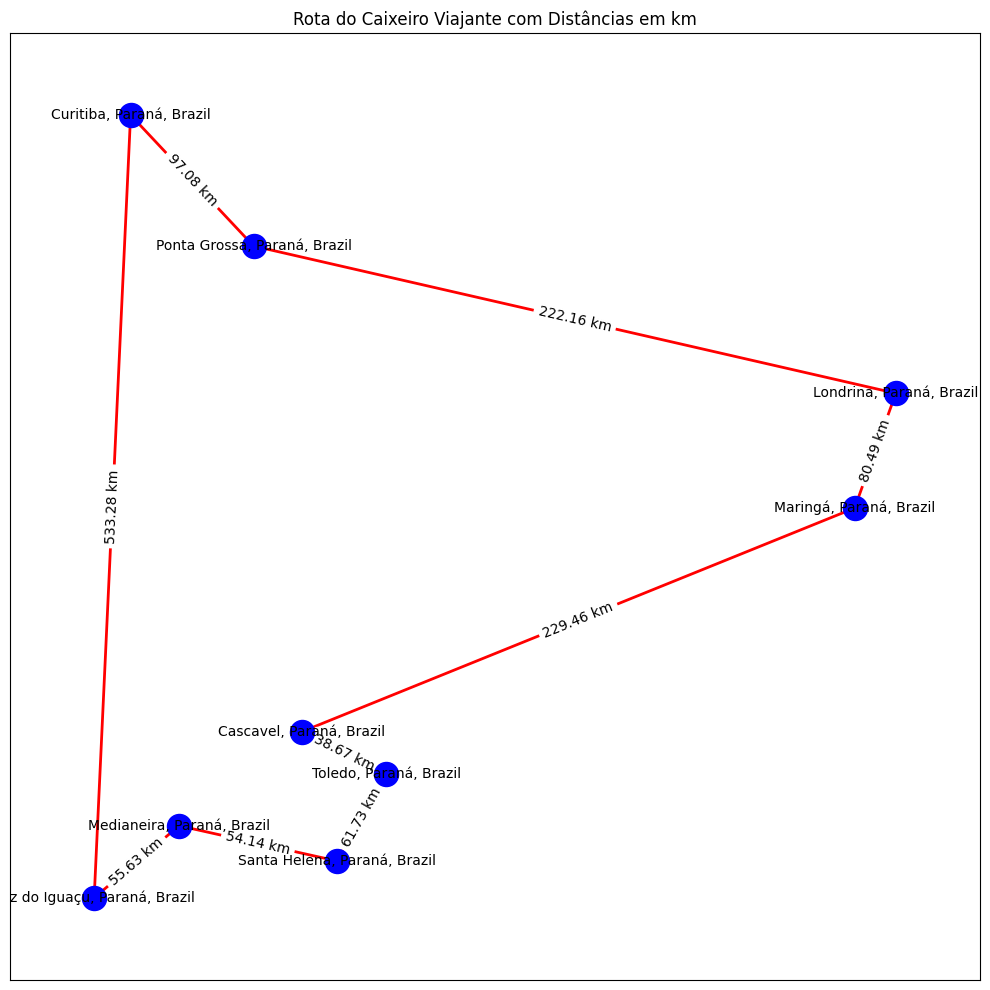

In [8]:
# Obter posições para o layout
pos = nx.get_node_attributes(G, 'pos')

# Plotar o grafo TSP com as cores personalizadas
plt.figure(figsize=(10, 10))  # Aumentando o tamanho da figura para melhor leitura

# Desenhar os nós (cidades) em azul
nx.draw_networkx_nodes(G_tsp, pos, node_color='blue', node_size=300)

# Desenhar as arestas percorridas em vermelho
nx.draw_networkx_edges(G_tsp, pos, edge_color='red', width=2)

# Desenhar os rótulos (nomes das cidades) em preto
nx.draw_networkx_labels(G_tsp, pos, font_color='black', font_size=10)

# Formatar as distâncias com duas casas decimais
edge_labels = {edge: f"{dist:.2f} km" for edge, dist in nx.get_edge_attributes(G_tsp, 'weight').items()}

# Adicionar os pesos (distâncias) nas arestas
nx.draw_networkx_edge_labels(G_tsp, pos, edge_labels=edge_labels, font_color='black')

# Título do gráfico
plt.title("Rota do Caixeiro Viajante com Distâncias em km")

# Ajustar o layout para centralizar e melhorar a leitura
plt.tight_layout()

# Exibir o gráfico
plt.show()


In [9]:
# Calculando a distância total em km
distancia_total = sum(nx.path_weight(G_tsp, [caminho_tsp[i], caminho_tsp[i+1]], weight='weight') for i in range(len(caminho_tsp)-1))

# Exibindo a ordem de percurso e a distância total
ordem_percurso = " -> ".join(caminho_tsp)
print(f"Ordem de Percurso: {ordem_percurso}\nDistância Total: {distancia_total:.2f} km")


Ordem de Percurso: Ponta Grossa, Paraná, Brazil -> Londrina, Paraná, Brazil -> Maringá, Paraná, Brazil -> Cascavel, Paraná, Brazil -> Toledo, Paraná, Brazil -> Santa Helena, Paraná, Brazil -> Medianeira, Paraná, Brazil -> Foz do Iguaçu, Paraná, Brazil -> Curitiba, Paraná, Brazil -> Ponta Grossa, Paraná, Brazil
Distância Total: 1372.64 km


In [10]:
import folium

# Inicializar um novo mapa centrado no Paraná
centro_mapa = [-24.7, -53.1]
mapa_tsp = folium.Map(location=centro_mapa, zoom_start=7)

# Adicionar marcadores e a rota do Caixeiro Viajante no mapa
caminho_tsp_coords = [pos[city] for city in caminho_tsp]  # Coordenadas da rota do TSP

# Adicionar os marcadores das cidades visitadas
for i, (lat, lon) in enumerate(caminho_tsp_coords):
    folium.Marker(
        [lat, lon],
        popup=f"<b>{caminho_tsp[i]}</b><br><a href='https://www.openstreetmap.org/?mlat={lat}&mlon={lon}' target='_blank'>Ver no Mapa</a>",
        tooltip=caminho_tsp[i]
    ).add_to(mapa_tsp)

# Adicionar a rota do Caixeiro Viajante ao mapa
folium.PolyLine(caminho_tsp_coords, color="red", weight=2.5, opacity=1).add_to(mapa_tsp)

# Salvar o mapa interativo da rota do TSP como um arquivo HTML
mapa_tsp.save("mapa_interativo_tsp.html")
